# CODSOFT

# TASK 4

# SPAM SMS DETECTION

Build an AI model that can classify SMS messages as spam or
legitimate. Use techniques like TF-IDF or word embeddings with
classifiers like Naive Bayes, Logistic Regression, or Support Vector

Machines to identify spam messages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Users\hp\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv("spam.csv",encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data = data.drop(["Unnamed: 2" , "Unnamed: 3" , "Unnamed: 4"] , axis = 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
new_column_names = {"v1":"Category","v2":"Message"}
data.rename(columns = new_column_names,inplace = True)

In [7]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [9]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
data.shape

(5572, 2)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(data["Category"])
le.classes_

array(['ham', 'spam'], dtype=object)

In [12]:
categ = le.transform(data["Category"])
categ

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
data["Category"] = categ
data.head()
# 'ham' ---> 0 , 'spam---->1

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


# Separate the feature (message) and target (category) data

X = data["Message"]
Y = data["Category"]

print(X)

# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

print(X.shape)
print(X_train.shape)
print(X_test.shape)

print(X_train)

print(type(X_train))

In [20]:
data['length']=data["Message"].apply(len)
data.head()

,Category,Message,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


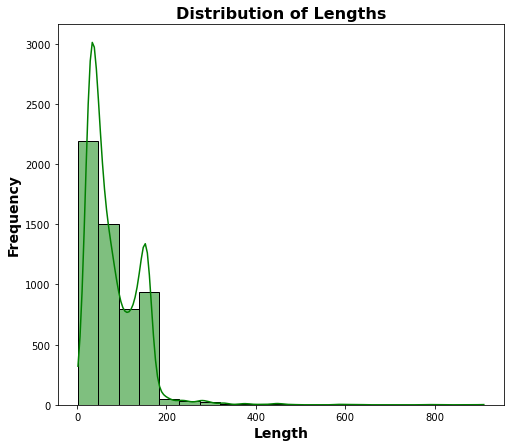

In [21]:
plt.figure(figsize=(8, 7))
#Add a kernel density estimate[[kde]]to smooth the histogram, providing complementary information about the shape of the distribution
sns.histplot(data=data, x='length' , bins=20, kde=True, color='green')
plt.xlabel('Length', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution of Lengths', fontsize=16, fontweight='bold')

plt.show()

# Data cleaning and preprocessing

In [22]:
"""Stop Words: A stop word is a commonly used word (such as “the”, “a”, “an”, “in”)
that a search engine has been programmed to ignore, 
both when indexing entries for searching and when 
retrieving them as the result of a search query. """


stop_words = set(stopwords.words('english'))
stemmer = LancasterStemmer()

In [23]:
def clean_text(text):
   
    text = text.lower()                                  # lower-case all characters
    text = re.sub('-',' ',text.lower())   # replace `word-word` as `word word`
    text = re.sub(f'[{string.digits}]',' ',text)  # remove digits
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])  # remove stopwords and stem other words
    text =  re.sub(r'@\S+', '',text)                     # remove twitter handles
    text =  re.sub(r'http\S+', '',text)                  # remove urls
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keep words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')   # remove stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text= re.sub("\s[\s]+", " ",text).strip()            # remove repeated/leading/trailing spaces
    return re.sub(f'[{re.escape(string.punctuation)}]','',text) # remove punctuations


# Test your cleaning function
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem


In [24]:
data['message_cleaning'] = data.Message.apply(clean_text)
data.head()

,Category,Message,length,message_cleaning
0,0,"Go until jurong point, crazy.. Available only ...",111,jurong point crazy avail bug gre world buffet ...
1,0,Ok lar... Joking wif u oni...,29,lar jok wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,fre entry wkly comp win cup fin tkts may text ...
3,0,U dun say so early hor... U c already then say...,49,dun say ear hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf liv around though


In [25]:
data['length_clean']=data['message_cleaning'].apply(len)
data.head()

,Category,Message,length,message_cleaning,length_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,jurong point crazy avail bug gre world buffet ...,57
1,0,Ok lar... Joking wif u oni...,29,lar jok wif oni,15
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,fre entry wkly comp win cup fin tkts may text ...,86
3,0,U dun say so early hor... U c already then say...,49,dun say ear hor already say,27
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf liv around though,35


In [26]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


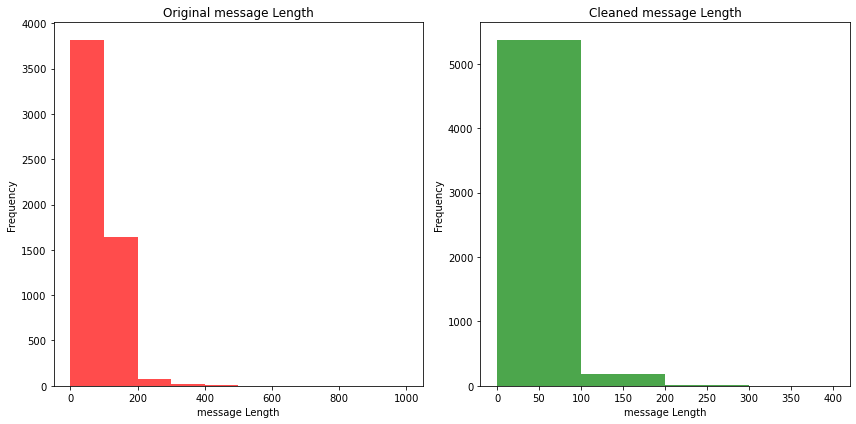

In [27]:
# Create histograms for text length before and after cleaning
plt.figure(figsize=(12, 6))

# Original text length distribution
plt.subplot(1, 2, 1)
original_lengths = data['Message'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) + 100, 100), color='red', alpha=0.7)
plt.title('Original message Length')
plt.xlabel('message Length')
plt.ylabel('Frequency')

# Cleaned text length distribution
plt.subplot(1, 2, 2)
cleaned_lengths = data["message_cleaning"].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) + 100, 100), color='green', alpha=0.7)
plt.title('Cleaned message Length')
plt.xlabel('message Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [28]:
outliers=data["length_clean"] > 300
outliers.sum()

4

In [29]:
(data["length_clean"] > 300).value_counts()

False    5568
True        4
Name: length_clean, dtype: int64

In [30]:
#Remove extremely long descriptions: outliers
data.drop(data[outliers].index,axis=0,inplace=True)     # filter rows having cleaned description length > 2000
print('Dataframe size (after removal): ',len(data))
print(f'Removed rows: {outliers.sum()}')

Dataframe size (after removal):  5568
Removed rows: 4


In [31]:
data.head()

,Category,Message,length,message_cleaning,length_clean
0,0,"Go until jurong point, crazy.. Available only ...",111,jurong point crazy avail bug gre world buffet ...,57
1,0,Ok lar... Joking wif u oni...,29,lar jok wif oni,15
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,fre entry wkly comp win cup fin tkts may text ...,86
3,0,U dun say so early hor... U c already then say...,49,dun say ear hor already say,27
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf liv around though,35


In [32]:
# Separate the feature (message) and target (category) data

X = data["message_cleaning"]
Y = data["Category"]

# Text Vectorization (TF-IDF)

In [33]:
# Create a TF-IDF vectorizer to convert text messages into numerical features

feature_tf_idf = TfidfVectorizer(lowercase=True, stop_words="english")


In [34]:
# Convert the training  messages into numerical features using TF-IDF

X = feature_tf_idf.fit_transform(X)


In [35]:
print(type(X))

<class 'scipy.sparse.csr.csr_matrix'>


In [36]:
print(X)

  (0, 6066)	0.21676270650002546
  (0, 2236)	0.18319692552782063
  (0, 972)	0.33738573048630205
  (0, 712)	0.37461244624898493
  (0, 6252)	0.2654360658127297
  (0, 2268)	0.22768939359597395
  (0, 714)	0.3441584650945675
  (0, 361)	0.30106493975873566
  (0, 1204)	0.3039004918053729
  (0, 4112)	0.29589004696714716
  (0, 2855)	0.3924268832219879
  (1, 3801)	0.5873303646838216
  (1, 6172)	0.4180247394356687
  (1, 2819)	0.5474356864665157
  (1, 2986)	0.4249853281268014
  (2, 242)	0.22646408858231784
  (2, 4381)	0.2618672735997438
  (2, 5794)	0.16916936640423963
  (2, 5200)	0.2676456186244658
  (2, 4334)	0.2784293937846938
  (2, 4421)	0.22068574355759588
  (2, 5513)	0.16125919028580324
  (2, 5639)	0.3004626028145931
  (2, 1921)	0.18563125913895107
  (2, 1254)	0.27447995021340515
  :	:
  (5563, 5617)	0.22621648337697586
  (5563, 3579)	0.3110420716526442
  (5563, 4160)	0.32042883433582386
  (5563, 757)	0.16662542439591507
  (5563, 980)	0.2535356964930655
  (5563, 4381)	0.35966735294937086
  (55

# Build and train the model

In [37]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 3)

In [38]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5568, 6399)
(4454, 6399)
(1114, 6399)


In [39]:
# Create a logistic regression model and train it on the training data

model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [40]:
# Make predictions on the training data and calculate the accuracy

prediction_on_training_data = model.predict(X_train)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [41]:
print("Accuracy on training data:",accuracy_on_training_data)

Accuracy on training data: 0.9667714414009879


In [43]:
# Make predictions on the test data and calculate the accuracy

prediction_on_test_data = model.predict(X_test)
accuracy_on_test_data = accuracy_score(Y_test,prediction_on_test_data)

In [44]:
print("Accuracy on test data:",accuracy_on_test_data)

Accuracy on test data: 0.952423698384201


In [48]:
# Test the model with some custom email messages

input_your_mail = [" Click the link to claim your prize now!"]
input_data_features = feature_tf_idf.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)


# Print the prediction result

if (prediction)[0] == 1:
    print("Spam Mail")
else:
    print("Ham Mail")
  

[1]
Spam Mail


In [49]:
input_your_mail = ["Meeting reminder: Tomorrow. See you there!"]
input_data_features = feature_tf_idf.transform(input_your_mail)
prediction = model.predict(input_data_features)
print(prediction)


# Print the prediction result

if (prediction)[0] == 1:
    print("Spam Mail")
else:
    print("Ham Mail")

[0]
Ham Mail
